In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import model_selection
import matplotlib.pyplot as plt

# Data Setup and Analysis

In [2]:
# Reading rating file
ratings = pd.read_csv('Data/BX-Book-Ratings.csv', sep=';', encoding='latin-1')

# Reading users file
users = pd.read_csv('Data/BX-Users.csv', sep=';', encoding='latin-1')

# Reading movies file
books = pd.read_csv('Data/BX-Books.csv',  sep=';', encoding='latin-1')

In [3]:
n_users = users['User-ID'].size
n_ratings = ratings['User-ID'].size
print('Number of users:', n_users)
print('Number of ratings', n_ratings)

Number of users: 278858
Number of ratings 1149780


In [4]:
# Data repartition

user_count = {}
ratings_count = np.zeros(11)
maximum = 0
ID = -1

for i in range(0,n_users):
    user_count[i+1] = 0

for element in ratings.values:
    user, ISBN, rating = element
    user_count[user]+=1
    ratings_count[rating]+=1
    if user_count[user]>maximum:
        maximum = user_count[user]
        ID = user

In [5]:
val = np.zeros(maximum+1)
for i in range(len(val)):
    val[i]=i
num = np.zeros(maximum+1)
for i in user_count:
    num[user_count[i]]+=1

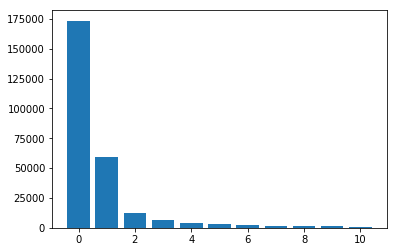

In [6]:
plt.bar(val[0:11],num[0:11])
plt.show()

In [7]:
cc = 0
k = 0
for i in num:
    if k>=5:
        cc += int(i)
    k+=1
print('Number of users with 5 ratings or more:',cc)

Number of users with 5 ratings or more: 22816


Most users only have 0 or 1 rating

=> We chose to train and evaluate the model on users with more than 5 ratings

<BarContainer object of 11 artists>

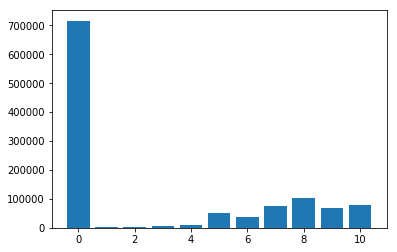

In [8]:
# rating repartition

plt.bar(range(11),ratings_count)

0 ratings dominant and seem unrealistic

=> delete all the 0 ratings

# Data Clearing

In [9]:
min_val = 5
min_ratings = 5

In [10]:
cleaned_data = ratings.copy()
cleaned_users = users.copy()
cleaned_books = books.copy()

In [11]:
# Delete all 0 ratings
cleaned_data = cleaned_data[ cleaned_data['Book-Rating']>0]

# Delete books with less than min_ratings ratings
ratings_per_book =  cleaned_data['ISBN'].value_counts()
cleaned_data = cleaned_data[cleaned_data['ISBN'].isin(ratings_per_book.index[ratings_per_book.values >= min_val])]

In [12]:
# Number of ratings per user
ratings_per_user = cleaned_data['User-ID'].value_counts()
ratings_per_book = cleaned_data['ISBN'].value_counts()

In [13]:
# Users with more than min_val ratings
cleaned_data = cleaned_data[cleaned_data['User-ID'].isin(ratings_per_user.index[ratings_per_user.values >= min_val])]

In [75]:
mat_train  = pd.pivot_table(cleaned_data, values='Book-Rating', index='User-ID', columns='ISBN')

In [134]:
means = {}
idx = mat_train.index
for i in idx:
    means[i] = np.nanmean(mat_train[mat_train.index==i])

In [152]:
ISBN_means = {}
ISBN_list = mat_train.columns
for i in ISBN_list:
    ISBN_means[i] = np.nanmean(mat_train[i].values)

# User - User

In [102]:
from scipy.stats import pearsonr as psr

In [103]:
def pearsons(user1, user2):
    return psr(user1[0], user2[0])[0]

#### Etape 3 :  Faire les prédictions en utilisant la formule vue en cours

La note de l'utilisateur $u$ sur l'élément $m$ est calculée comme :
$$ pred(u,m) = \bar{r}_u + \sum_j sim(u,u_j) (r_{j,m} - \bar{r}_j)$$, la somme sur les utilisateurs qui ont jugé $m$.


In [ ]:
def predict(user):
    for i in ISBN_list:
        prediction = pred
pred(u,m)

In [ ]:
def find_closest(user, k, data, n_user):
    closest = np.zeros(k)
    sim = {}
    for user2 in data:
        score = pearsons(user, data[data.index=user2].values[0])
        sim[user]=score
    sim = sorted(sim.values)

In [169]:
k = {8:8, 11:3, 23:2}

In [170]:
k.values()

dict_values([8, 3, 2])

In [171]:
sorted(k.items(), key = lambda kv:(kv[1], kv[0]))

[(23, 2), (11, 3), (8, 8)]